#### Dataset Validation. 
This notebook is to validate the dataset that has been created by auto-labeled images

- input: raw images with yolov5 format annotation
- validation: visually validating that annotation is accurate.

To test images, please update the `image_folder_path`, `annotation_folder_path` variables. 

In [129]:
# update folder path if not data/processed folder
image_folder_path = "c:data/processed/hs/validate/images" # c: current directory
annotation_folder_path = "c:data/processed/hs/validate/labels" # c: current directory

In [130]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        
    return images

def load_annotations_from_folder(folder):
    txt_files = filter(lambda x: x[-4:] == '.txt', os.listdir(folder))
    annotations = []
    for filename in txt_files:
        with open(os.path.join(folder,filename), 'r') as reader:
            annotations.append(reader.read().split())
            
    return annotations

In [131]:
os.listdir(image_folder_path) # c: current directory
## should see the list of images. If not please change. 

['bunny_1.jpg',
 'bunny_100.jpg',
 'bunny_106.jpg',
 'bunny_107.jpg',
 'bunny_108.jpg',
 'bunny_112.jpg',
 'bunny_122.jpg',
 'bunny_135.jpg',
 'bunny_14.jpg',
 'bunny_15.jpg',
 'bunny_16.jpg',
 'bunny_21.jpg',
 'bunny_29.jpg',
 'bunny_41.jpg',
 'bunny_42.jpg',
 'bunny_51.jpg',
 'bunny_6.jpg',
 'bunny_61.jpg',
 'bunny_63.jpg',
 'bunny_67.jpg',
 'bunny_71.jpg',
 'bunny_75.jpg',
 'bunny_77.jpg',
 'bunny_79.jpg',
 'bunny_80.jpg',
 'bunny_81.jpg',
 'bunny_98.jpg']

In [132]:
images = load_images_from_folder(image_folder_path)

annotations = load_annotations_from_folder(annotation_folder_path)
# class_id, x_center, y_center, width, and the height 
# scaled from 0 to 1

annotations[0]

['0', '0.5375', '0.46979166666666666', '0.4375', '0.51875']

In [133]:
images[0].shape 
# notice that shape is height by width (not same order as annotations) 

(480, 640, 3)

#### Load images and annotation from the folder and display them for visualization

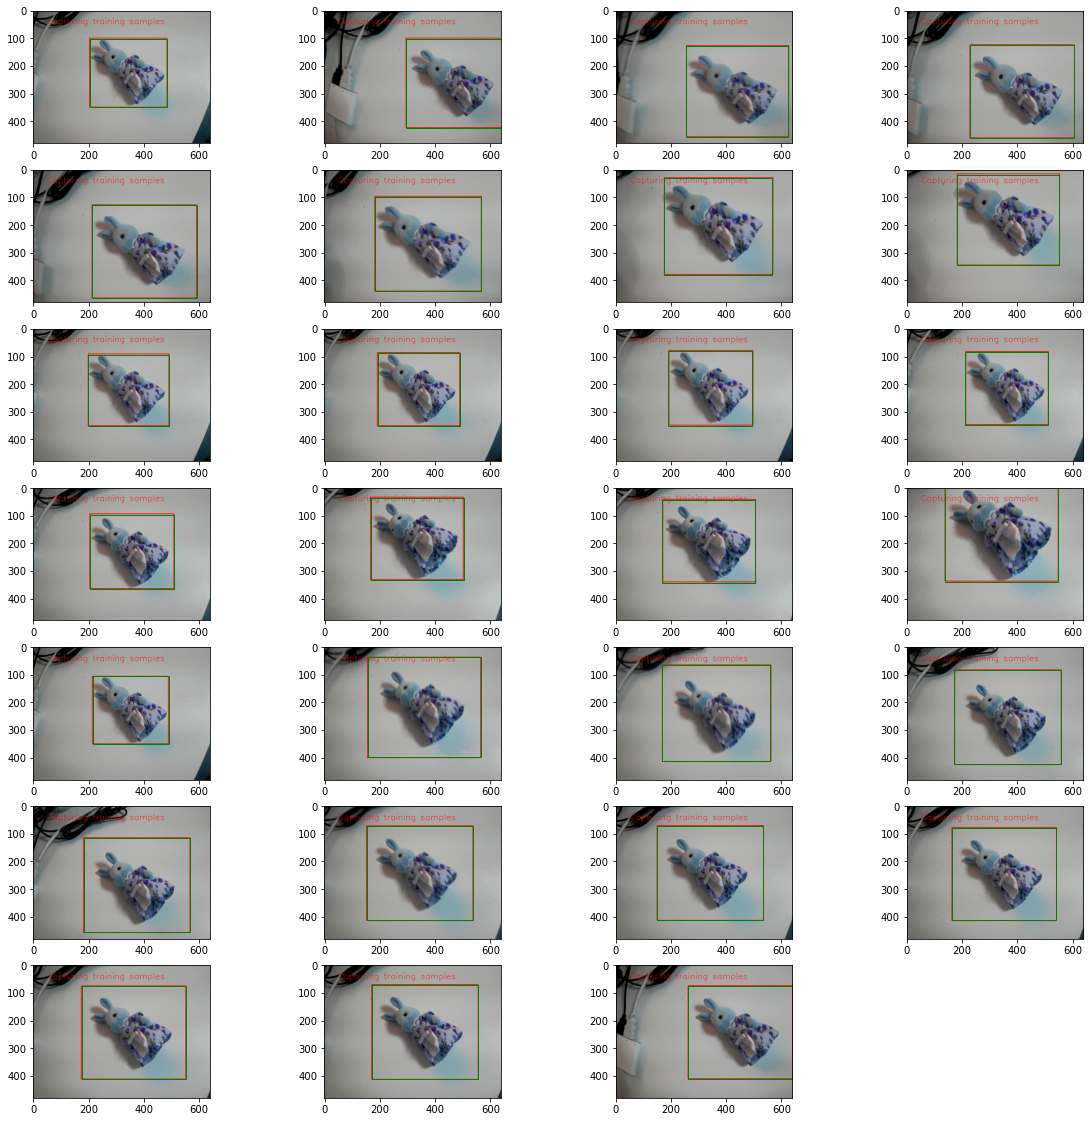

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches #to draw rectangle 

fig=plt.figure(figsize=(20, 20))
columns = 4
rows = math.ceil(len(images) / columns)

for i in range(1, len(images) + 1):
    ax = fig.add_subplot(rows, columns, i)
    img = images[i-1]
    plt.imshow(img)
    # Create a Rectangle patch
    # yolov5 annotation format: class_id, x_center, y_center, width, and the height 
    w = float(annotations[i-1][3])*img.shape[1]
    h = float(annotations[i-1][4])*img.shape[0]
    x = float(annotations[i-1][1])*img.shape[1] - w/2
    y = float(annotations[i-1][2])*img.shape[0] - h/2
    
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='green',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()